<a href="https://colab.research.google.com/github/AbidMorshed/CAES-system/blob/main/3_Compressor_4_Turbine_CAES_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyromat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyromat: filename=PYroMat-2.2.4-py3-none-any.whl size=1009765 sha256=443f8c33f1ad3d43843f080ab278bd7706986c80cece3afc9c105618214a114f
  Stored in directory: /root/.cache/pip/wheels/ac/a6/c0/a9ccb2f23445c0a49467f88368ea611126b22011c53a91ee51
Successfully built pyromat


In [ ]:
import pyromat as pm 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
air=pm.get('ig.air')
pm.config
Ta=273
L=1.3
P_drop=0.0005*L

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

###**Compressor Function**

In [ ]:
#rc=compression ratio 
#T_in=inlet temperature  
#P_in=inlet pressure 
def compressor (T_in,P_in,rc):
  T_in=T_in+273
  gamma=(air.cp(T_in,P_in)/air.cv(T_in,P_in))
  n_pol=0.91-((rc-1)/300)  #n_pol=polytropic index
  n=gamma*n_pol/(gamma*n_pol-gamma+1)                
  P_out=rc*P_in
  T_out=T_in*pow(rc,((n-1)/n))
  h_in=air.h(T_in,P_in)
  h_out=air.h(T_out,P_out)
  s_in=air.s(T_in,P_in)
  s_out=air.s(T_out,P_out)
  wc=h_out-h_in
  ed=-Ta*(s_in-s_out)
  T_out=T_out-273
  return T_out, P_out, wc, ed
  print('Outlet temperature is %0.3f \nOutlet Pressure is %0.3f \nwork output= %0.3f \nexergy destruction is %0.3f'%(T_out,P_out,wc,ed))

##**Turbine Function**

In [ ]:
def turbine (T_in,P_in,rt):
  T_in=T_in+273
  gamma=(air.cp(T_in,P_in)/air.cv(T_in,P_in))
  n_pol=0.90-(rt-1)/250
  P_out=P_in/rt
  n=1/(1-((n_pol*(gamma-1))/gamma))
  T_out=T_in/(pow(rt,((n-1)/n)))
  h_in=air.h(T_in,P_in)
  h_out=air.h(T_out,P_out)
  s_in=air.s(T_in,P_in)
  s_out=air.s(T_out,P_out)
  wt=h_in-h_out
  ed=-Ta*(s_in-s_out)
  T_out=T_out-273
  return T_out, P_out, wt, ed
  print('Outlet temperature is %0.3f \nOutlet Pressure is %0.3f \nwork output= %0.3f \nexergy destruction is %0.3f'%(T_out,P_out,wt,ed))

###**Point 1-9 (Compressor)**

In [ ]:
rc=[6,4.5,2.5]
rt=[1.54,2.22,2.7]
#compressor 1
#point 1
Tc1,Pc1=[25,1.013]
#compressor 1 outlet
#point 2 
Tc2, Pc2, wc1, ex_dc1=compressor (Tc1,Pc1,rc[0])
#compressor 2 inlet (assumed)
#point 3
Tc3,Pc3=[68.08,Pc2-P_drop]
#compressor 2 outlet
#point 4
Tc4, Pc4, wc2, ex_dc2=compressor (Tc3,Pc3,rc[1])
#compressor 3 inlet (assumed)
#point 5
Tc5,Pc5=[67.13,Pc4-P_drop]
#compressor 3 outlet
#point 6
Tc6, Pc6, wc3, ex_dc3=compressor (Tc5,Pc5,rc[2])

#point 7 (assumed)
Tc7,Pc7=[68.52,Pc6-P_drop]

#Exergy destruction in pcm
#table
dfc=pd.DataFrame()
for i in range (1,8):
  dfc.loc[i,['point','Temperature','Pressure']]=i,globals()['Tc'+str(i)],globals()['Pc'+str(i)]

display(dfc)
dfwc=pd.DataFrame()
for i in range (1,4):
  dfwc.loc[i,['Compressor no','Work done','Exergy Destruction']]=i,globals()['wc'+str(i)],globals()['ex_dc'+str(i)]
display(dfwc)



/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

,point,Temperature,Pressure
1,1.0,25.000000,1.013000
2,2.0,255.545841,6.078000
3,3.0,68.080000,6.077350
4,4.0,276.494436,27.348075
5,5.0,67.130000,27.347425
6,6.0,180.833310,68.368562
7,7.0,68.520000,68.367912


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

,Compressor no,Work done,Exergy Destruction
1,1.0,234.536493,18.509700
2,2.0,212.924576,14.975522
3,3.0,115.312548,8.015845


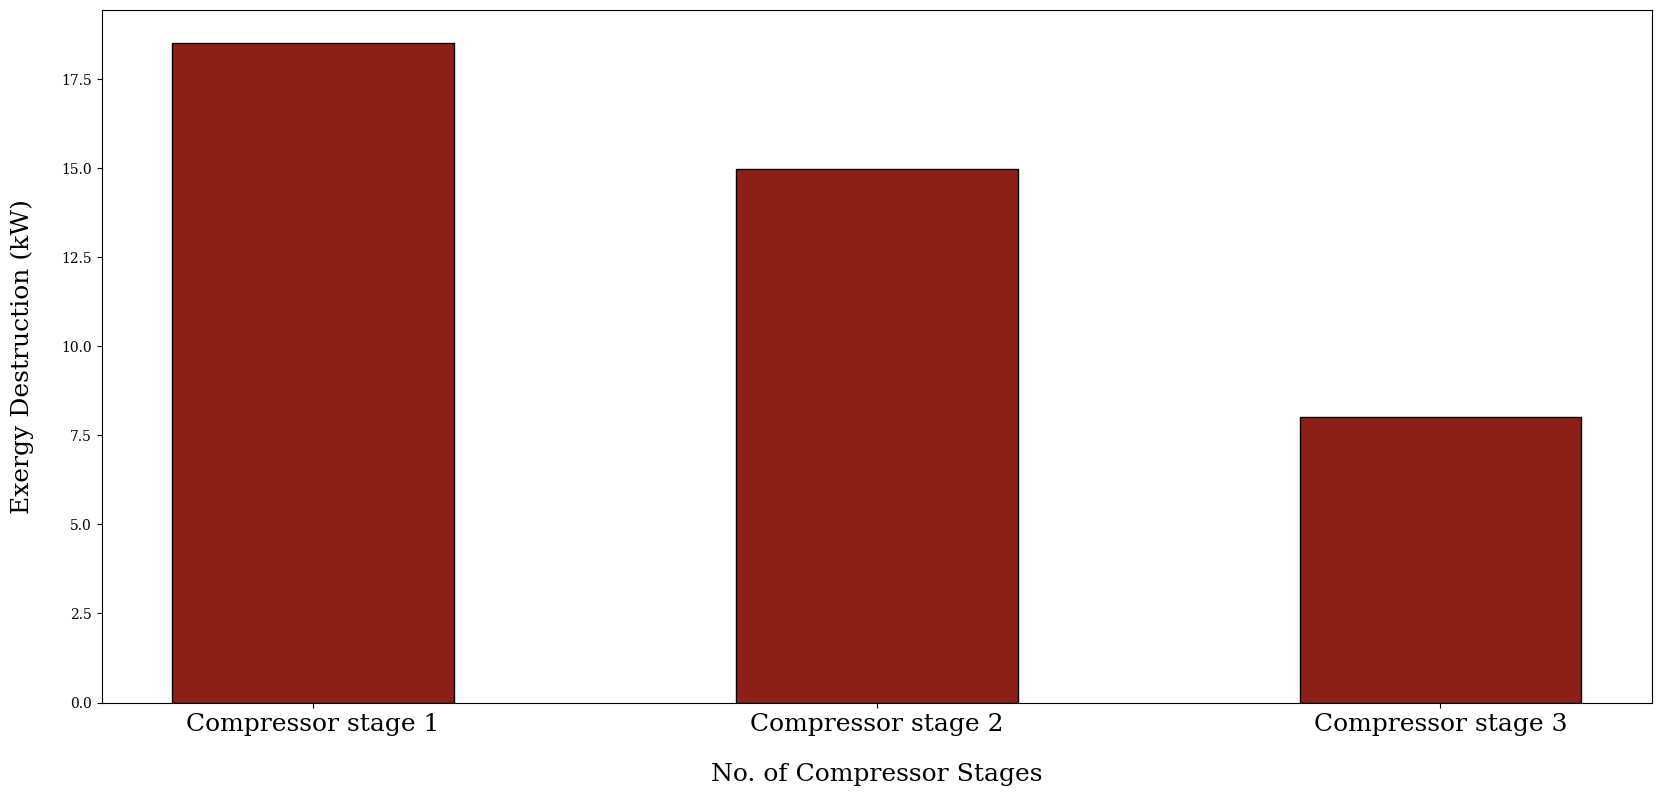

In [ ]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwc['Compressor no'], height=dfwc['Exergy Destruction'],color='#8d1f17',edgecolor='black',width=0.5 )
# plt.title('Exergy Destruction of Compressor',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwc['Compressor no'])
ax1.set_xticklabels(['Compressor stage 1','Compressor stage 2','Compressor stage 3'],fontsize=18)

plt.xlabel('No. of Compressor Stages',fontsize=18,labelpad=20)
plt.ylabel('Exergy Destruction (kW)',fontsize=18, labelpad=20)
plt.savefig('/content/Figure/Exergy Destruction of Compressor.jpg')

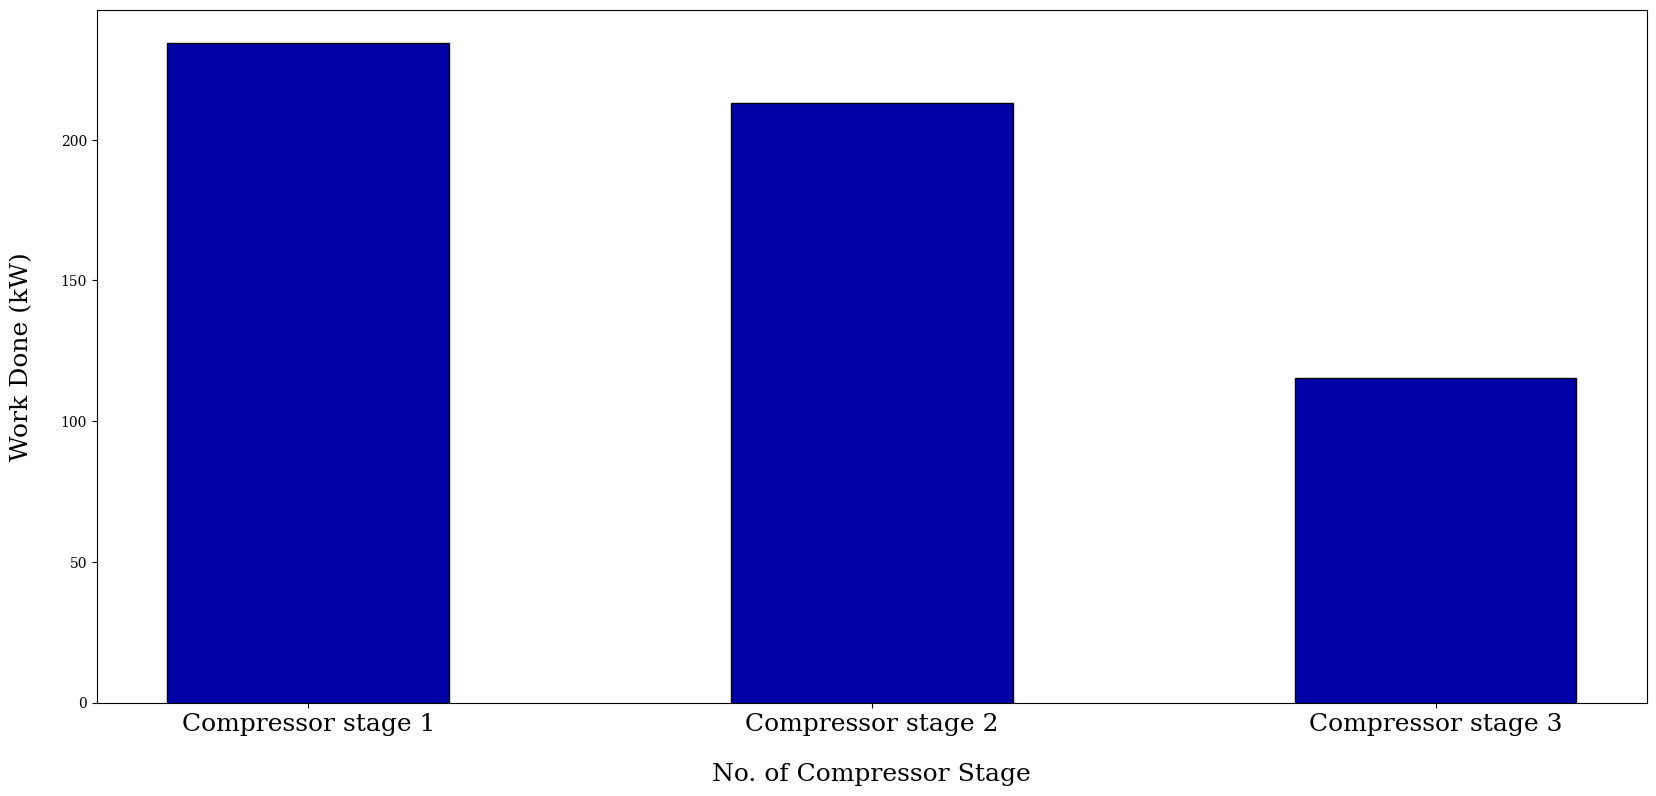

In [ ]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwc['Compressor no'], height=dfwc['Work done'],color='#0000a7',edgecolor='black',width=0.5 )
# plt.title('Work Done by Compressor',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwc['Compressor no'])
ax1.set_xticklabels(['Compressor stage 1','Compressor stage 2','Compressor stage 3'],fontsize=18)

plt.xlabel('No. of Compressor Stage',fontsize=18,labelpad=20)
plt.ylabel('Work Done (kW)',fontsize=18,labelpad=20)
plt.savefig('/content/Figure/Work Done of Compressor.jpg')

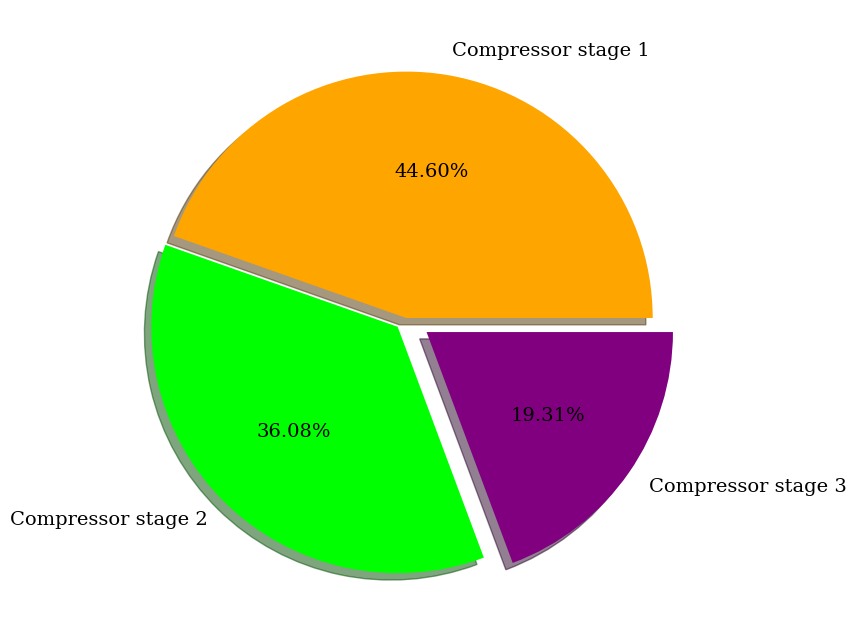

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(dfwc['Exergy Destruction'], autopct='%0.2f%%', explode=(0,0.05,0.1), labels=['Compressor stage 1','Compressor stage 2','Compressor stage 3'], colors=['orange','lime','purple','green'], textprops={'fontsize':14},shadow=True  ,radius=1)
plt.savefig('/content/Figure/Exergy Destruction of Compressor Pie.png')
plt.show()

###**Point 10-12(Cavern & Throttle Valve)**

In [ ]:
#Cavern
T8,P8=[Tc7,0.95*Pc7]

#cavern outlet
h_cavern=air.h(T8+273,P8)
h_cavern_outlet=.9*h_cavern[0]

T_outlet=T8+(h_cavern_outlet-h_cavern)/air.cp(T8+273)  #delh=m Cp delT

T9,P9=[T_outlet,120.824]

#Throttle valve
#point 12
T10,P10=[58.90,60.41]

#Exergy destruction of Throttle Valve
ex_dth=(air.s(T10+273,P10)-air.s(T9+273,P9))*Ta
display(ex_dth)
dfcv=pd.DataFrame()
for i in range (8,11):
  dfcv.loc[i,['point','Temperature','Pressure']]=i,globals()['T'+str(i)],globals()['P'+str(i)]
dfcv

array([49.62782786])

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,point,Temperature,Pressure
8,8.0,68.520000,64.949517
9,9.0,64.613505,120.824000
10,10.0,58.900000,60.410000


###**Point 12-21 (Turbine)**

In [ ]:
rc=[6,4.5,2.5]
rt=[1.54,2.22,2.7,3.33]
#turbine 1
#point 10
Tt10,Pt10=[58.90,60.41]
#turbine 1 outlet
#point 11 
Tt11, Pt11, wt1, ex_dt1=turbine (Tt10,Pt10,rt[0])
#turbine 2 inlet (assumed)
#point 12
Tt12,Pt12=[100.67,Pt11-P_drop]
#turbine 2 outlet
#point 13
Tt13, Pt13, wt2, ex_dt2=turbine (Tt12,Pt12,rt[1])
#turbine 3 inlet (assumed)
#point 14
Tt14,Pt14=[127.13,Pt13-P_drop]
#turbine 3 outlet
#point 15
Tt15, Pt15, wt3, ex_dt3=turbine (Tt14,Pt14,rt[2])
#turbine 4 inlet (assumed)
#point 16
Tt16,Pt16=[221.1,Pt15-P_drop]
#turbine 4 outlet
#point 19
Tt17, Pt17, wt4, ex_dt4=turbine (Tt16,Pt16,rt[3])


#table
dft=pd.DataFrame()
for i in range (11,18):
  dft.loc[i,['point','Temperature','Pressure']]=i,globals()['Tt'+str(i)],globals()['Pt'+str(i)]

display(dft)
dfwt=pd.DataFrame()
for i in range (1,5):
  dfwt.loc[i,['Turbine no','Work done','Exergy Destruction']]=i,globals()['wt'+str(i)],globals()['ex_dt'+str(i)]
dfwt

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

,point,Temperature,Pressure
11,11.0,24.177693,39.227273
12,12.0,100.670000,39.226623
13,13.0,32.117378,17.669650
14,14.0,127.130000,17.669000
15,15.0,38.279527,6.544074
16,16.0,221.100000,6.543424
17,17.0,93.423858,1.964992


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

,Turbine no,Work done,Exergy Destruction
1,1.0,34.923224,3.495442
2,2.0,69.088370,6.739357
3,3.0,89.686527,8.654098
4,4.0,130.069223,11.166689


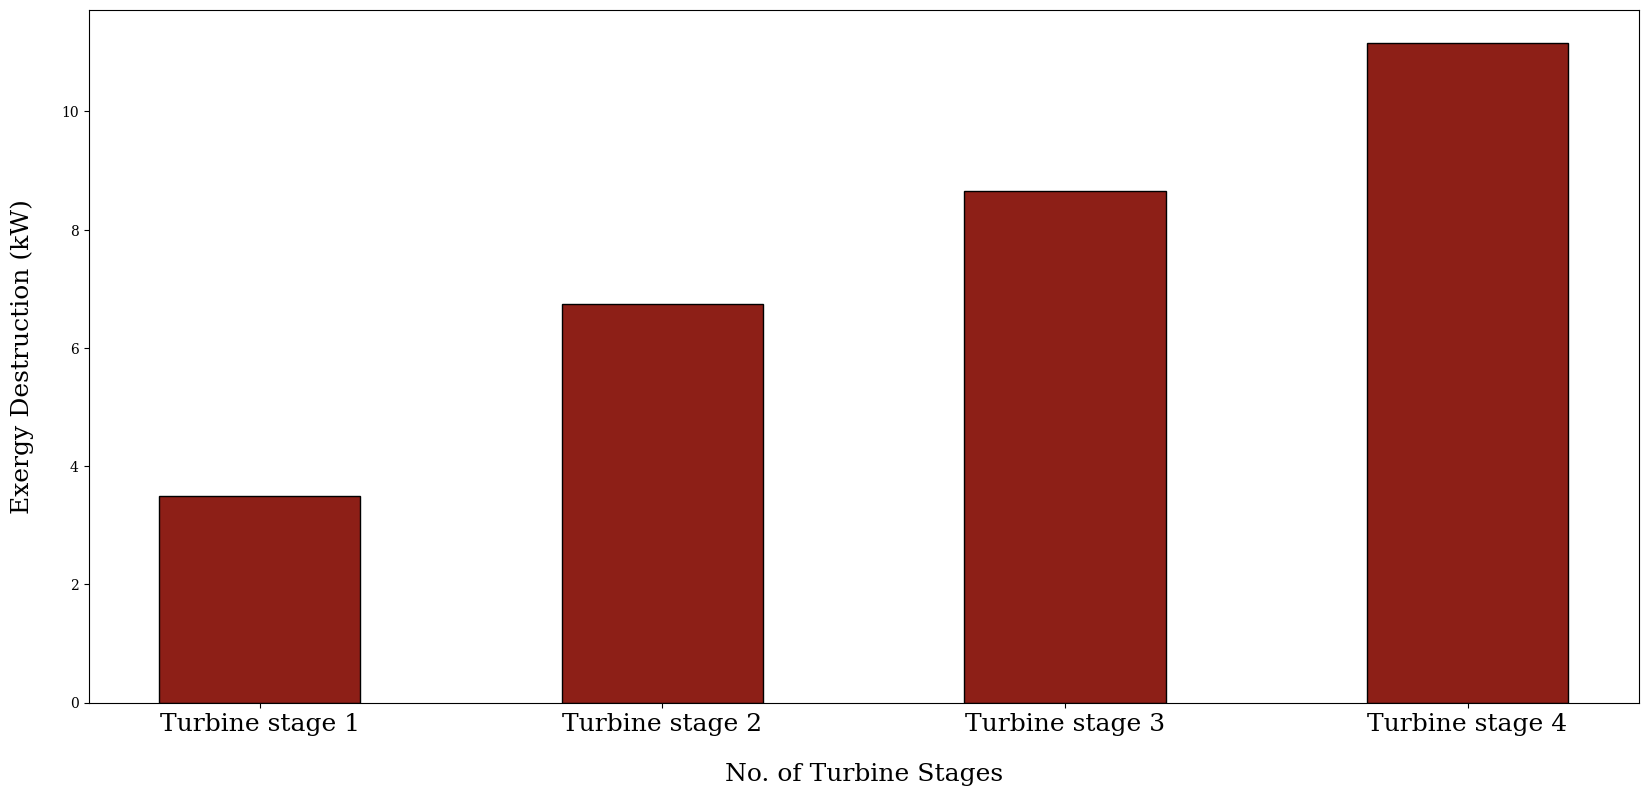

In [ ]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwt['Turbine no'], height=dfwt['Exergy Destruction'],color='#8d1f17',edgecolor='black',width=0.5 )
# plt.title('Exergy Destruction of Turbine',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwt['Turbine no'])
ax1.set_xticklabels(['Turbine stage 1','Turbine stage 2','Turbine stage 3','Turbine stage 4'],fontsize=18)

plt.xlabel('No. of Turbine Stages',fontsize=18,labelpad=20)
plt.ylabel('Exergy Destruction (kW)',fontsize=18,labelpad=20)
plt.savefig('/content/Figure/Exergy Destruction of Turbine.jpg')

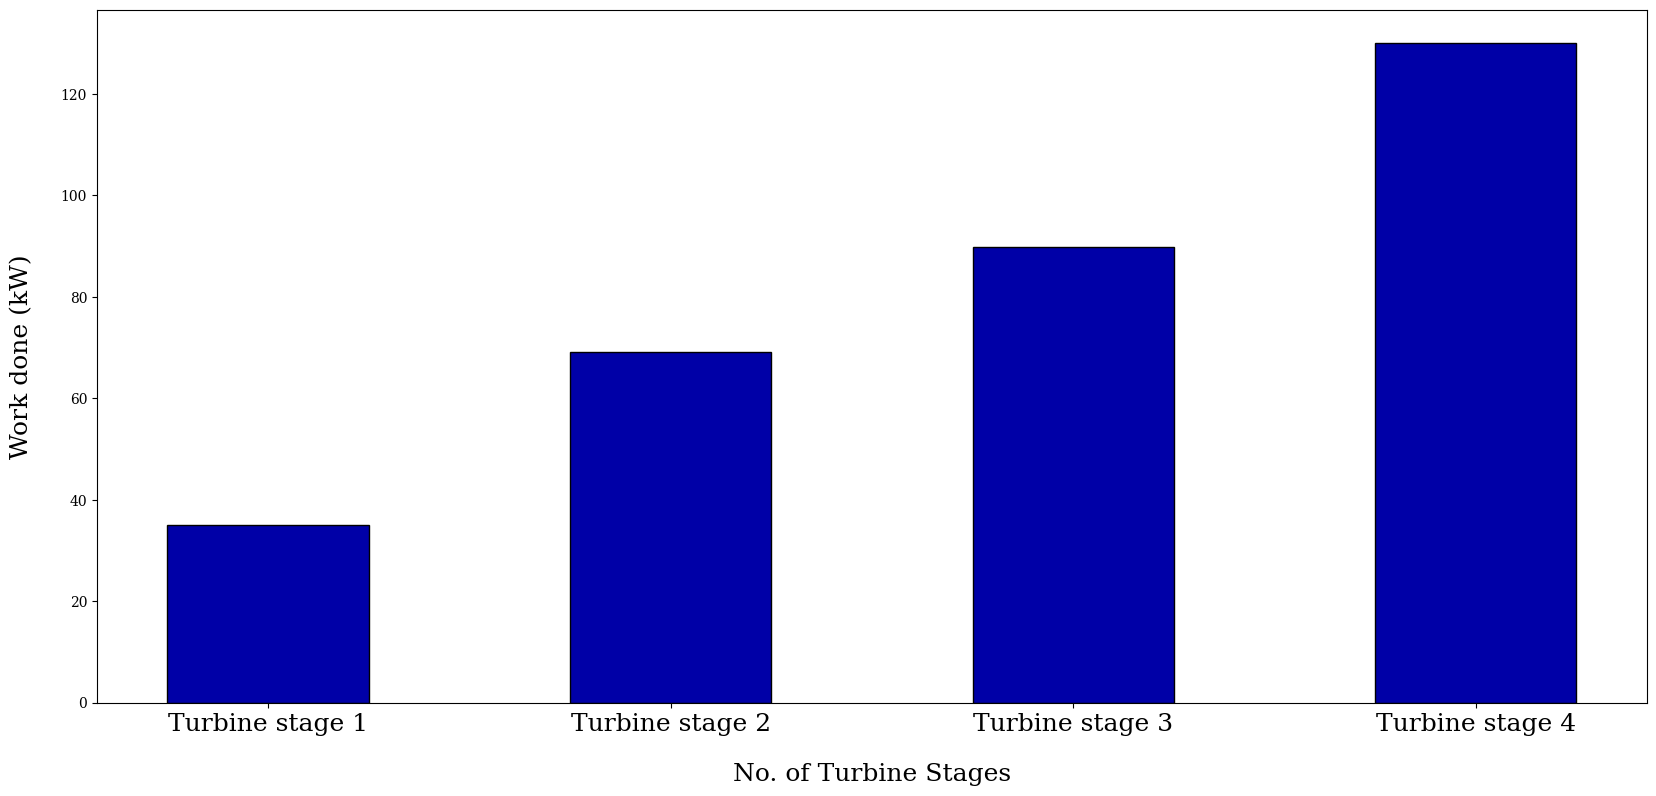

In [ ]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwt['Turbine no'], height=dfwt['Work done'],color='#0000a7',edgecolor='black',width=0.5 )
# plt.title('Work done of Turbine',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwt['Turbine no'])
ax1.set_xticklabels(['Turbine stage 1','Turbine stage 2','Turbine stage 3','Turbine stage 4'],fontsize=18)

plt.xlabel('No. of Turbine Stages',fontsize=18,labelpad=20)
plt.ylabel('Work done (kW)',fontsize=18,labelpad=20)
plt.savefig('/content/Figure/Work Done of Turbine.jpg')

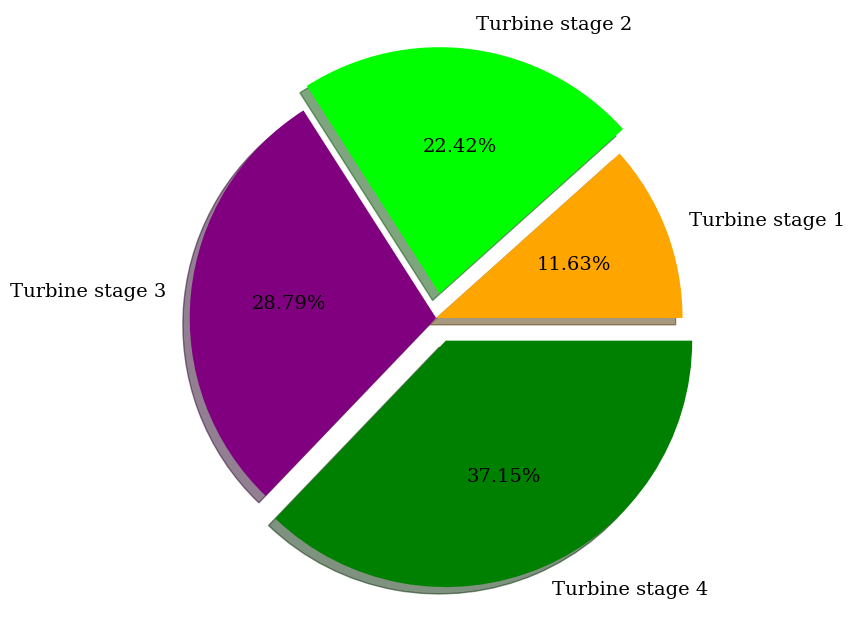

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(dfwt['Exergy Destruction'], autopct='%0.2f%%', explode=(0,0.1,0,0.1), labels=['Turbine stage 1','Turbine stage 2','Turbine stage 3','Turbine stage 4'], colors=['orange','lime','purple','green','red'],shadow=True, textprops={'fontsize':14}  ,radius=1)
plt.savefig('/content/Figure/Exergy Destruction of Turbine Pie.png')
plt.show()

###**All Point Plot and Table**

In [ ]:
#PCM exergy destruction
pcm=pd.DataFrame()
pcm1=air.h(Tc2+273,Pc2)-air.h(Tc3+273,Pc3)-Ta*(air.s(Tc2+273,Pc2)-air.s(Tc3+273,Pc3))-(air.h(Tt16+273,Pt16)-air.h(Tt15+273,Pt15)-Ta*(air.s(Tt16+273,Pt16)-air.s(Tt15+273,Pt15)))
pcm2=air.h(Tc4+273,Pc4)-air.h(Tc5+273,Pc5)-Ta*(air.s(Tc3+273,Pc3)-air.s(Tc5+273,Pc5))-(air.h(Tt14+273,Pt14)-air.h(Tt13+273,Pt13)-Ta*(air.s(Tt14+273,Pt14)-air.s(Tt13+273,Pt13)))
pcm3=air.h(Tc6+273,Pc6)-air.h(Tc7+273,Pc7)-Ta*(air.s(Tc6+273,Pc6)-air.s(Tc7+273,Pc7))-(air.h(Tt12+273,Pt12)-air.h(Tt11+273,Pt11)-Ta*(air.s(Tt12+273,Pt12)-air.s(Tt11+273,Pt11)))


In [ ]:
#Efficiency
Efficiency=(dfwt['Work done'].sum(axis=0)/dfwc['Work done'].sum(axis=0))*100
Efficiency

57.53065427957632

In [ ]:
exergy_compressor=sum(dfwc['Exergy Destruction'])
exergy_turbine=sum(dfwt['Exergy Destruction'])
exergy_pcm=pcm1[0]+pcm2[0]+pcm3[0]
exergy_throttle=ex_dth[0]

In [ ]:
Loss=100-Efficiency
total_exergy=exergy_compressor+exergy_turbine+exergy_pcm+exergy_throttle
System_ed=(total_exergy/Loss)*Efficiency
System_ed

308.95074504690604

In [ ]:
name=[['Compressor'],['Turbine'],['TES'],['Throttle Valve'],['System']]
exergy_total=pd.DataFrame([exergy_compressor,exergy_turbine,exergy_pcm,exergy_throttle,System_ed])
exergy_total=pd.concat([pd.DataFrame(name),exergy_total],axis=1)
exergy_total.columns=['Component','Exergy']
exergy_total

,Component,Exergy
0,Compressor,41.501067
1,Turbine,30.055587
2,TES,106.884123
3,Throttle Valve,49.627828
4,System,308.950745


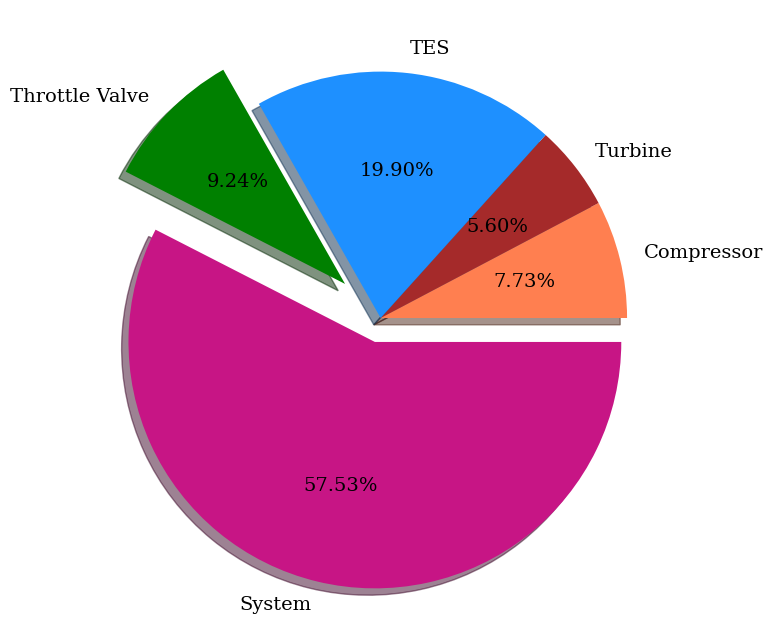

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(exergy_total['Exergy'], autopct='%0.2f%%', explode=(0,0,0,0.2,0.1), labels=['Compressor','Turbine','TES','Throttle Valve','System'], colors=['coral','brown','dodgerblue','green','mediumvioletred'],textprops={'fontsize':14},shadow=True ,radius=1)
plt.savefig('/content/Figure/Exergy Destruction of Components Pie.png')
plt.show()

In [ ]:
df_total = pd.concat([dfc, dfcv, dft], ignore_index=True, sort=False)
df_total

,point,Temperature,Pressure
0,1.0,25.000000,1.013000
1,2.0,255.545841,6.078000
2,3.0,68.080000,6.077350
3,4.0,276.494436,27.348075
4,5.0,67.130000,27.347425
5,6.0,180.833310,68.368562
6,7.0,68.520000,68.367912
7,8.0,68.520000,64.949517
8,9.0,64.613505,120.824000
9,10.0,58.900000,60.410000


In [ ]:
df_total.to_csv("/content/Figure/Table of Temperature and Pressure.csv")

**Zipping folder and Download**

In [ ]:
!zip -r /content/file.zip /content/Figure

  adding: content/Figure/ (stored 0%)
  adding: content/Figure/Work Done of Turbine.jpg (deflated 68%)
  adding: content/Figure/Work Done of Compressor.jpg (deflated 70%)
  adding: content/Figure/Exergy Destruction of Components Pie.png (deflated 5%)
  adding: content/Figure/Table of Temperature and Pressure.csv (deflated 50%)
  adding: content/Figure/Exergy Destruction of Compressor Pie.png (deflated 9%)
  adding: content/Figure/Exergy Destruction of Turbine.jpg (deflated 68%)
  adding: content/Figure/Exergy Destruction of Turbine Pie.png (deflated 8%)
  adding: content/Figure/Exergy Destruction of Compressor.jpg (deflated 67%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>